In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
mnist = pd.read_csv('https://raw.githubusercontent.com/sbussmann/kaggle-mnist/master/Data/train.csv')

In [ ]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


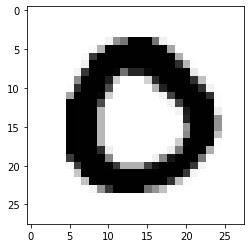

In [ ]:
d1 = np.array(mnist.iloc[4, 1:])
plt.imshow(d1.reshape(28,28), cmap='Greys')

In [ ]:
d1.mean(), d1.min(), d1.max(), d1.std()

(65.16964285714286, 0, 254, 104.79540585659257)

<AxesSubplot:>

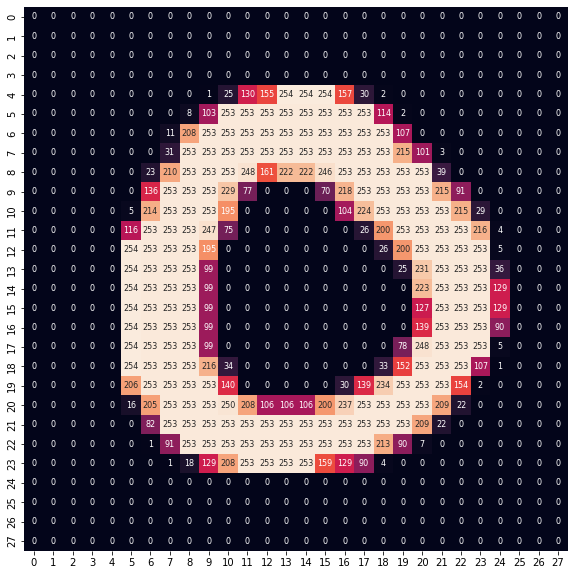

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(d1.reshape(28,28), square=True, cbar=False, annot=True, fmt='g', annot_kws={'fontsize': 8})

<BarContainer object of 68 artists>

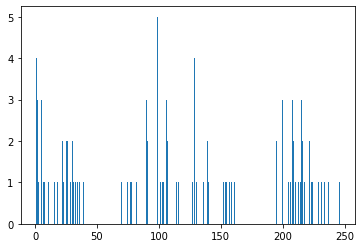

In [ ]:
c, f = np.unique(d1, return_counts=True)
plt.bar(c[1:-5], f[1:-5])

<AxesSubplot:>

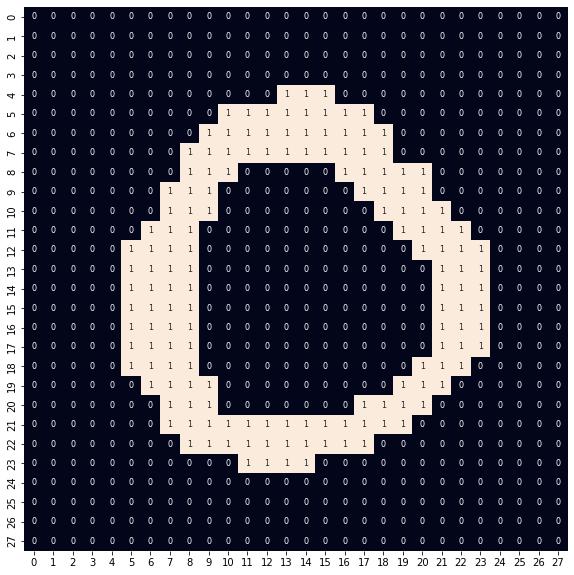

In [ ]:
thres_bin = 252

digit_bw = d1.copy()

pos_over_threshold = np.where(d1 > thres_bin)
pos_below_threshold = np.where(d1 <= thres_bin)

digit_bw[pos_over_threshold] = 1
digit_bw[pos_below_threshold] = 0

plt.figure(figsize=(10,10))
sns.heatmap(digit_bw.reshape(28,28), square=True, 
    cbar=False, annot=True, fmt='g', annot_kws={'fontsize': 8})

<AxesSubplot:>

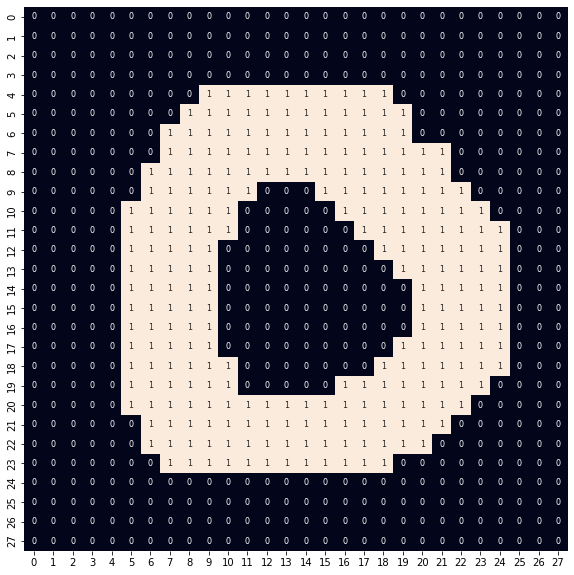

In [ ]:
thres_bin = 0
digit_bw = d1.copy()

pos_over_threshold = np.where(d1 > thres_bin)
pos_below_threshold = np.where(d1 <= thres_bin)

digit_bw[pos_over_threshold] = 1
digit_bw[pos_below_threshold] = 0

plt.figure(figsize=(10,10))
sns.heatmap(digit_bw.reshape(28,28), square=True, 
    cbar=False, annot=True, fmt='g', annot_kws={'fontsize': 8})

In [ ]:
digit_bw.mean(), digit_bw.min(), digit_bw.max(), digit_bw.std()

(0.33163265306122447, 0, 1, 0.4707997838623102)

<BarContainer object of 2 artists>

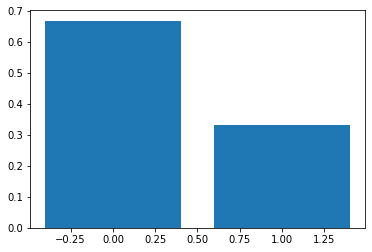

In [ ]:
c, f = np.unique(digit_bw, return_counts=True)
plt.bar(c, f/sum(f))

In [ ]:
mnist_array = np.array(mnist.iloc[:, 1:])
pos_not_zero = np.where(mnist_array)
pos_not_zero

(array([    0,     0,     0, ..., 41999, 41999, 41999]),
 array([132, 133, 134, ..., 715, 716, 717]))

In [ ]:
mnist_array[pos_not_zero] = 1
mnist_array.mean(), mnist_array.min(), mnist_array.max(), mnist_array.std()

(0.19152964042759962, 0, 1, 0.39350481225173833)

In [ ]:
for i in range(10):
    digits = mnist[mnist['label'] == i]  # filter data
    mnist_array = np.array(digits.iloc[:, 1:])  # filtered data to array
    pos_not_zero = np.where(mnist_array)  # binarization
    mnist_array[pos_not_zero] = 1
    print(i, len(mnist_array), mnist_array.mean(), mnist_array.min(), 
        mnist_array.max(), mnist_array.std())



0 4132 0.24457012960072702 0 1 0.4298320384845817
1 4684 0.10935212577772356 0 1 0.31208049981634
2 4177 0.2155203055605771 0 1 0.4111828102579836
3 4351 0.20857127613168916 0 1 0.40628721233197496
4 4072 0.18048406739906178 0 1 0.38459013093701766
5 3795 0.19484115780699632 0 1 0.39607837738435725
6 4137 0.2017985403008194 0 1 0.40134260854446846
7 4401 0.16762887840889593 0 1 0.3735363938524216
8 4063 0.22190487073490484 0 1 0.4155274949735933
9 4188 0.18271866411320975 0 1 0.3864357047399917


In [ ]:
p = 0.24457
np.sqrt(p * (1-p))

0.42983196146866515

In [ ]:
i = 0
digits = mnist[mnist['label'] == i]  # filter data
mnist_array_0 = np.array(digits.iloc[:, 1:])  # filtered data to array
pos_not_zero = np.where(mnist_array_0)  # binarization
mnist_array_0[pos_not_zero] = 1
print(i, len(mnist_array), mnist_array_0.mean(), mnist_array_0.min(), 
    mnist_array_0.max(), mnist_array_0.std())

i = 1
digits = mnist[mnist['label'] == i]  # filter data
mnist_array_1 = np.array(digits.iloc[:, 1:])  # filtered data to array
pos_not_zero = np.where(mnist_array_1)  # binarization
mnist_array_1[pos_not_zero] = 1
print(i, len(mnist_array_1), mnist_array_1.mean(), mnist_array.min(), 
    mnist_array_1.max(), mnist_array_1.std())

0 4684 0.24457012960072702 0 1 0.4298320384845817
1 4684 0.10935212577772356 0 1 0.31208049981634


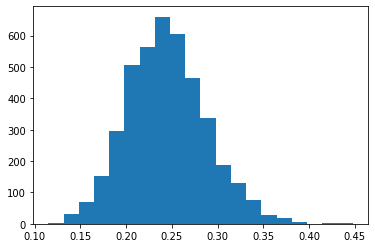

In [ ]:
mean_zero_digits = mnist_array_0.mean(axis=1)
h = plt.hist(mean_zero_digits, bins=20)

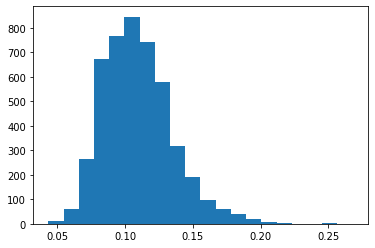

In [ ]:
mean_one_digits = mnist_array_1.mean(axis=1)
h = plt.hist(mean_one_digits, bins=20)

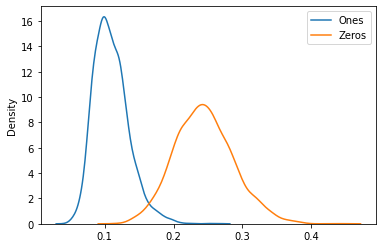

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(mean_one_digits, ax=ax, label='Ones')
sns.kdeplot(mean_zero_digits, ax=ax, label='Zeros')
plt.legend()

In [ ]:
mean_one_digits.var(), mean_zero_digits.var(), len(mean_one_digits), len(mean_zero_digits)

(31.63290110206846, 116.49380621041499, 4684, 4132)

(1, 0)

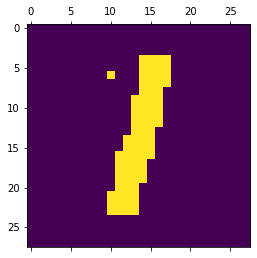

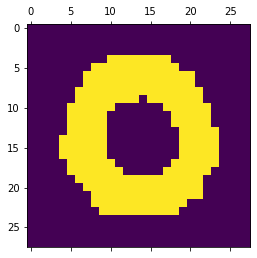

In [ ]:
plt.matshow(mnist_array_1[12].reshape(28,28))
plt.matshow(mnist_array_0[0].reshape(28,28))
class_th = 0.165 # activity (mean) threshold
int(mnist_array_1[0].mean() < class_th), int(mnist_array_0[0].mean() < class_th)

In [ ]:
d1 = mnist_array_1[12]
d0 = mnist_array_0[0]

In [ ]:
d1.mean(), d0.mean()

(0.10204081632653061, 0.3125)

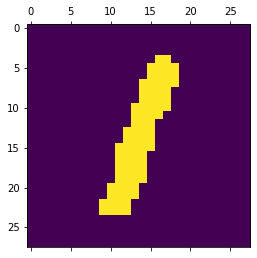

In [ ]:
d1_2d = d1.reshape(28,28)
plt.matshow(d1_2d)

In [ ]:
d1_c = d1_2d.sum(axis=0)
d1_f = d1_2d.sum(axis=1)

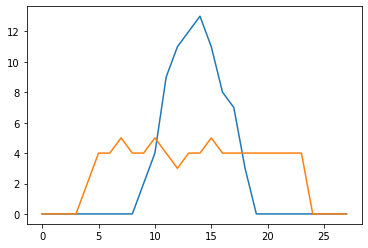

In [ ]:
plt.plot(range(28), d1_c)
plt.plot(range(28), d1_f)

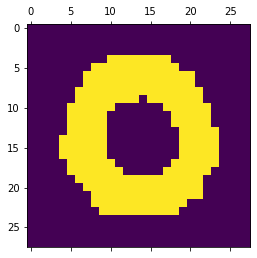

In [ ]:
d0_2d = d0.reshape(28,28)
plt.matshow(d0_2d)

In [ ]:
d0_c = d0_2d.sum(axis=0)
d0_f = d0_2d.sum(axis=1)

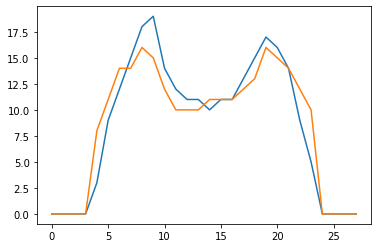

In [ ]:
plt.plot(range(28), d0_c)
plt.plot(range(28), d0_f)

In [ ]:
28*28, 'vs', len(d0_c) + len(d0_f)

(784, 'vs', 56)

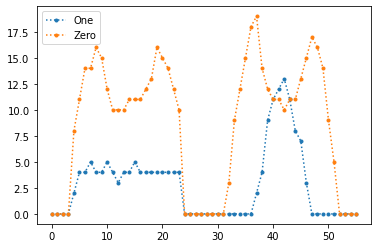

In [ ]:
plt.plot(np.concatenate((d1_f,d1_c)), ':.', label='One')
plt.plot(np.concatenate((d0_f,d0_c)), ':.', label='Zero')
plt.legend()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>